<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/Deep_Learning_and_Neural_network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep learning and neural network project
Objective:

Train a neural network to classify movie reviews from the IMDb dataset as positive or negative.

Dataset:

The dataset contains movie reviews with corresponding sentiments (positive or negative).
It's stored in a file named 'IMDB Dataset.csv'.

Instructions
Tools and Libraries Required:

Python
Pandas for data handling
Matplotlib and Seaborn for data visualization
NLTK for text preprocessing
Scikit-learn for machine learning utilities
TensorFlow/Keras for building and training neural network models
Steps:

Data Loading and Exploration:

Load the data using Pandas.
Explore the dataset to understand the distribution of sentiments, the length of reviews, and other characteristics.

Data Preprocessing:

Convert all reviews to lower case.
Remove HTML tags and URLs from reviews.
Tokenize the text and remove stop words.
Use TF-IDF Vectorization to convert text data into a format suitable for input into the neural network.

Model Building:

Construct a Sequential model with Dense layers:
First layer: Dense, ReLU activation (input dimension should match the number of features from TF-IDF).
Hidden layers: experiment with different sizes and activations.
Output layer: Dense, Sigmoid activation (binary classification).
Compile the model with binary crossentropy loss and accuracy metrics.

Model Training:

Train the model using the training set.
Use a validation split to monitor performance on unseen data during training.
Adjust parameters like the number of epochs and batch size as needed.

Evaluation:

Evaluate the model on a separate test set to assess its performance.
Use metrics such as accuracy and loss.

Visualization:

Plot training and validation loss over epochs.
Plot training and validation accuracy over epochs.

Report:

Provide insights gained from the project.
Discuss any challenges faced and how they were overcome.
Suggest potential improvements for the model or preprocessing steps.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#load the data using pandas
data = pd.read_csv('/content/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#Explore the dataset to understand the distribution of sentiments, the length of reviews, and other characteristics.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
data.describe(include = 'all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [12]:
! pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f8171c0bdb95f5a66ecbdf4d16c0dedb3cc66452b25a2a657bdbb19877476118
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [13]:
#pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'pandas profiling report')
Report= profile.to_notebook_iframe()


/tmp/ipython-input-13-2380187467.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:24<00:00, 12.02s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [14]:
#convert all reviews to lower case
data['review'] = data['review'].str.lower()
data.columns

Index(['review', 'sentiment'], dtype='object')

In [16]:
#Remove HTML tags and URLs from review by using regex
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
data['review'] = data['review'].apply(lambda x:remove_html_tags(x))
data.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [17]:
#Tokenize the text and remove stop words in the dataset
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Use TF-IDF Vectorization to convert text data into a format suitable for input into the neural network


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# You might want to adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Example: consider top 5000 features

# Fit and transform the 'review' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (50000, 5000)


## Model Building

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(tfidf_matrix.shape[1],)), # First layer with input shape
    Dense(64, activation='relu'), # Example hidden layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [20]:
from sklearn.model_selection import train_test_split

# Separate features (TF-IDF matrix) and labels (sentiment)
X = tfidf_matrix
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) # Convert sentiment to numerical (0 for negative, 1 for positive)

# Split data into training and validation sets
# You can adjust the test_size and random_state as needed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
# You can adjust the epochs and batch_size as needed
history = model.fit(X_train, y_train,
                    epochs=5, # Example number of epochs
                    batch_size=32, # Example batch size
                    validation_data=(X_val, y_val))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8352 - loss: 0.3707 - val_accuracy: 0.8930 - val_loss: 0.2588
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9158 - loss: 0.2095 - val_accuracy: 0.8905 - val_loss: 0.2653
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9353 - loss: 0.1645 - val_accuracy: 0.8884 - val_loss: 0.2823
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9682 - loss: 0.0876 - val_accuracy: 0.8849 - val_loss: 0.4068
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 0.8782 - val_loss: 0.5476


## Evaluation

In [21]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - loss: 0.5210
Validation Loss: 0.5475997924804688
Validation Accuracy: 0.8781999945640564


## Visualization

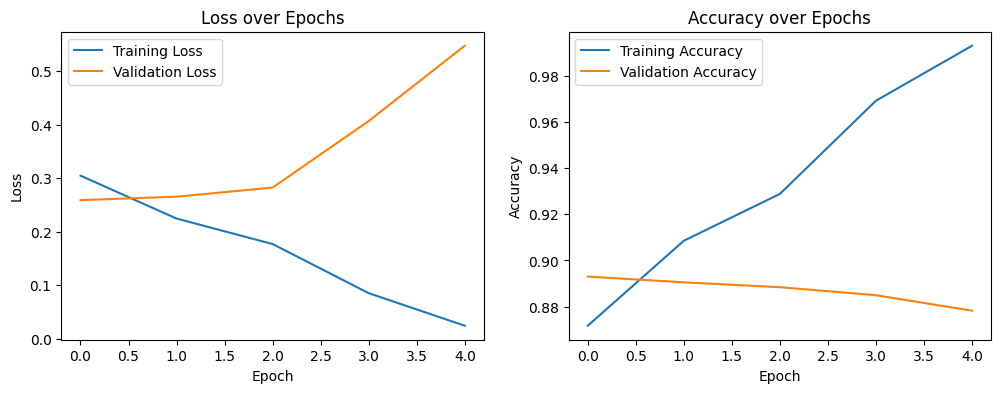

In [22]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Report

Based on the visualizations and the accuracy and loss results, we could suggest that:

**Training Progress:** The training loss is decreasing and the training accuracy is increasing steadily over the epochs. This indicates that the model is learning from the training data.
**Validation Performance**: The validation accuracy is reasonably high (around 87.8%), suggesting the model has learned to classify movie reviews with a good level of accuracy on unseen data. However, the validation loss starts to increase after a few epochs, and the validation accuracy seems to plateau or slightly decrease.
**Potential Overfitting**: The divergence between the training metrics (loss decreasing, accuracy increasing) and the validation metrics (loss increasing, accuracy plateauing/decreasing) after a certain point (around epoch 2 or 3) is a strong indicator of overfitting. The model is performing very well on the training data but is not generalizing as well to the unseen validation data. It might be starting to learn noise or specific patterns in the training data that are not present in the validation data.
To mitigate overfitting, we could consider:

**Adding Regularization**: Techniques like L1 or L2 regularization, or dropout layers, can help prevent the model from becoming too complex and overfitting the training data.
**Early Stopping:** You could implement early stopping to stop the training process when the validation loss starts to increase, preventing further overfitting.
Reducing Model Complexity: The current model has two dense layers with 128 and 64 units. You could try reducing the number of units or layers to make the model simpler.
**Getting More Data:** While not always feasible, having a larger and more diverse dataset can help the model generalize better.